<a href="https://colab.research.google.com/github/DaiZack/webscrapingCodes/blob/master/webscraping4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Open a page in code
requests is a toll to make a web call easily (most common action get, post)

In [ ]:
import requests # pick the library

url = 'https://en.wikipedia.org/wiki/Data_analysis'
res = requests.get(url) # make a get call to the url
print(res.content) # print the source code of the html

b'<!DOCTYPE html>\n<html class="client-nojs" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8"/>\n<title>Data analysis - Wikipedia</title>\n<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"dd9dd483-6821-43ce-b2e1-266785373ee2","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Data_analysis","wgTitle":"Data analysis","wgCurRevisionId":978640766,"wgRevisionId":978640766,"wgArticleId":2720954,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Articles with short description","Short description is different from Wikidata","All articles with specifically marked weasel-worded phrases","Articles with speci

# HTML Basic 

```
<!DOCTYPE html>
<html>
   <head>
      <title>This is document title</title>
   </head>    
   <body>
      <h1>This is a heading</h1>
      <p style="color:red">Hello World!</p>
   </body>    
</html>
```

<!DOCTYPE html>
<!DOCTYPE html>
<html>
   <head>
      <title>This is document title</title>
   </head>    
   <body>
      <h1>This is a heading</h1>
      <p style="color:red">Hello World!</p>
   </body>    
</html>

'''


** The core of the scraping job is to find the right tag and element**

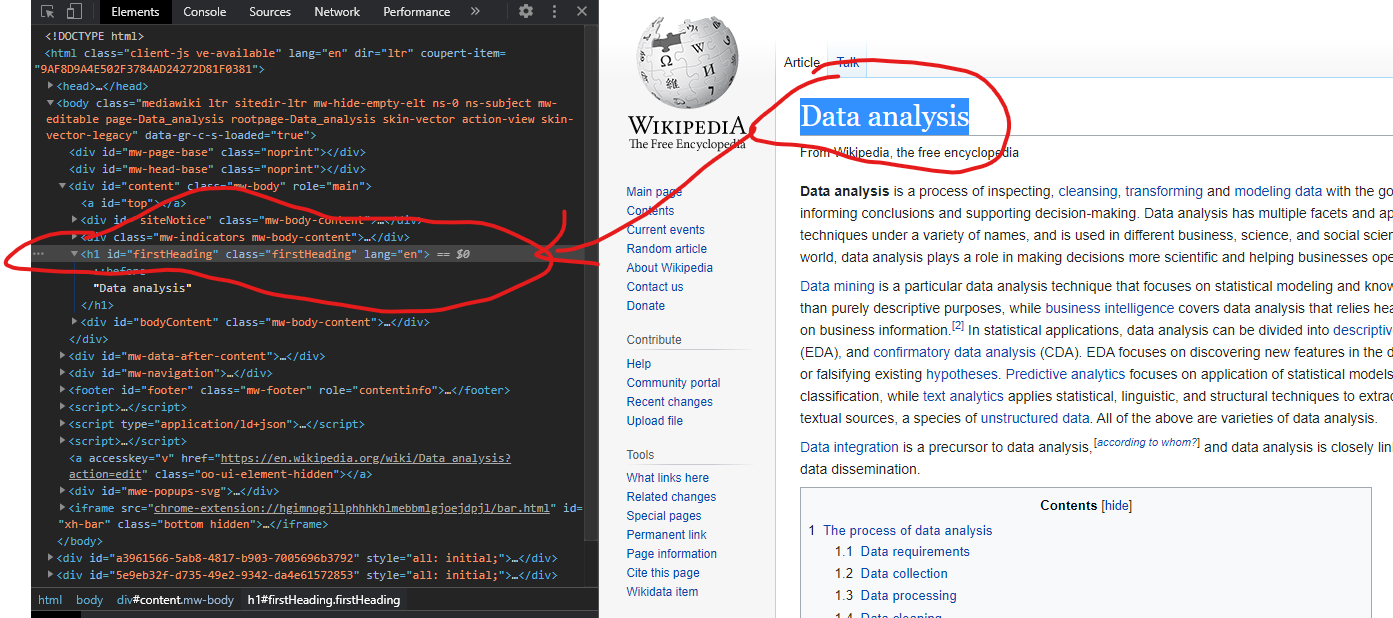

 In this case to find the tile is to find the according tag ```<h1>```

In [4]:
from lxml import html 
page = html.fromstring(res.content)  # convert the string to lxml object for easy parsing
title = page.xpath('//h1/text()')  # find the text in the <h1> tag, note: in this case only one <h1>
print(title)

['Data analysis']


# Another example for h3[link text](https:// [link text](https://)) tag

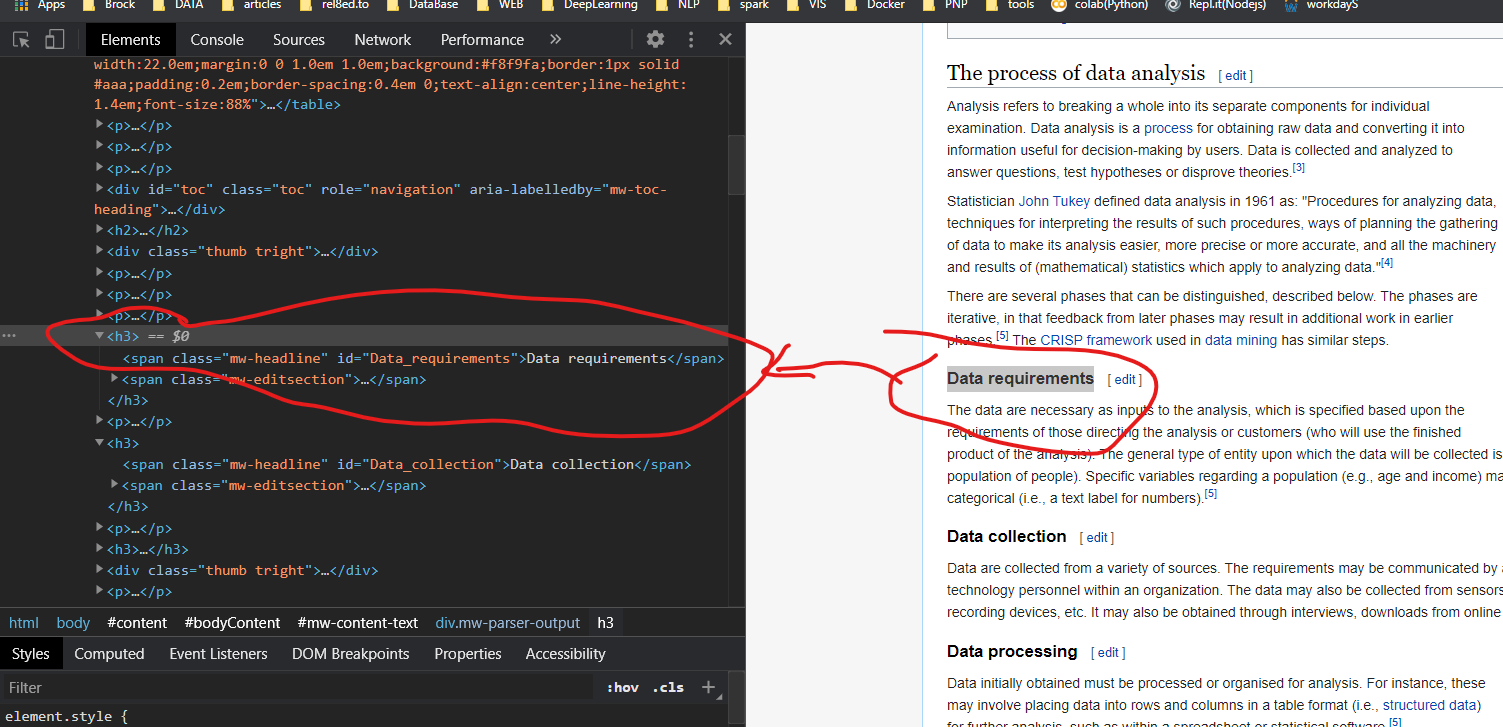

In [7]:
h3tags = page.xpath('//h3/span/text()')  # find the text in the <h1> tag, note: in this case only one <h1>
print(h3tags)

['Data requirements', 'Data collection', 'Data processing', 'Data cleaning', 'Exploratory data analysis', 'Modeling and algorithms', 'Data product', 'Communication', 'Confusing fact and opinion', 'Cognitive biases', 'Innumeracy', 'Smart buildings', 'Analytics and business intelligence', 'Education', 'Initial data analysis', 'Main data analysis', 'Citations', 'Bibliography', 'Personal tools', 'Namespaces', 'Variants', 'Views', 'More', 'Navigation', 'Contribute', 'Tools', 'Print/export', 'In other projects', 'Languages']


if we use ```<span>``` under ```<h3>```, we get all the subtitles in the same format

# First Practice: find all pages related to term "Data analysis" in wikipedia

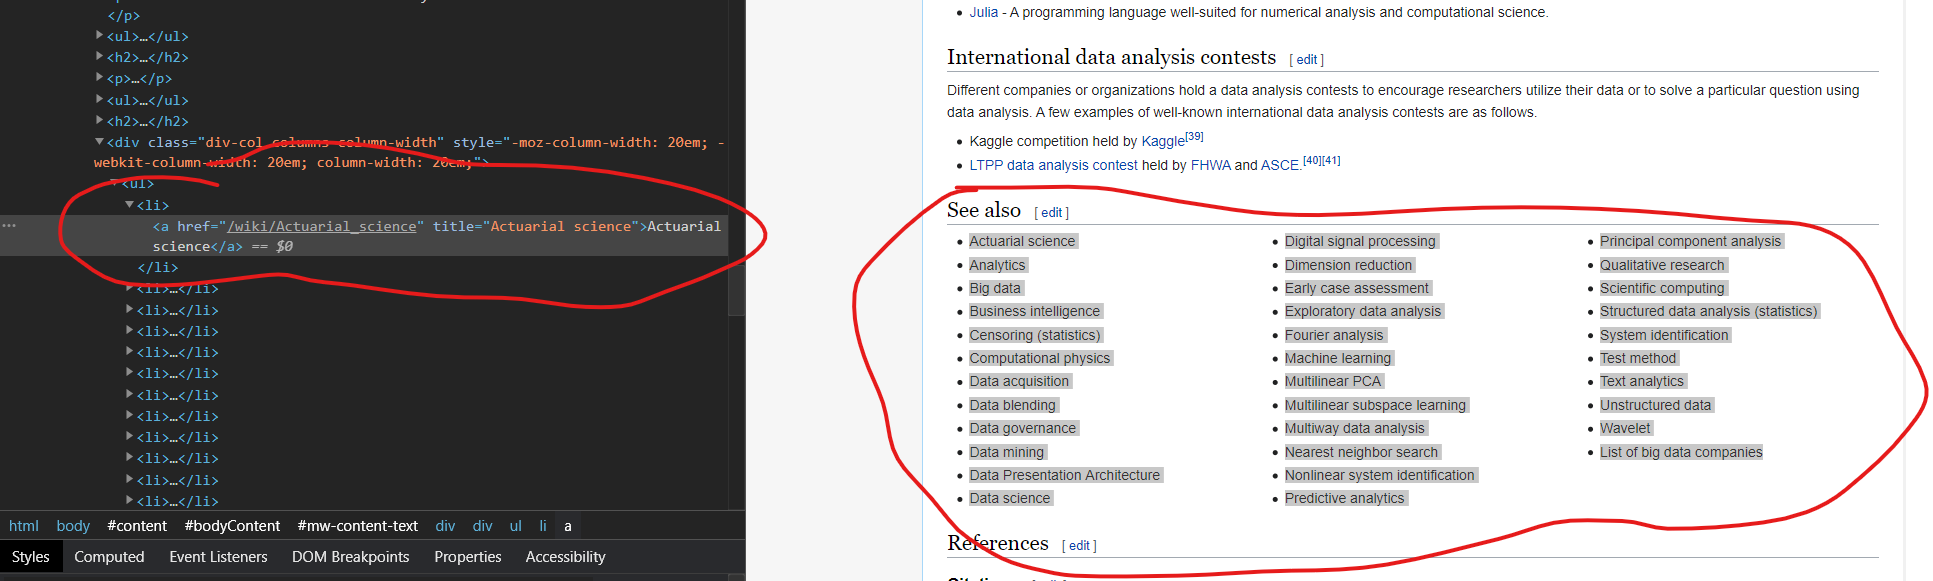

after check the page strucure we found that they are under ```<a>``` tag in ```<li>```(list) tags within ```ul``` that is in ```<div>``` which has ```class``` equal to ```div-col columns column-width```

Tips: With a chrome extension 'Xpath helper' you can easily find and test the rule

we get the xpath rule ```//div[@class='div-col columns column-width']/ul/li/a```



In [8]:
terms = page.xpath("//div[@class='div-col columns column-width']/ul/li/a/text()")
print(terms)

['Actuarial science', 'Analytics', 'Big data', 'Business intelligence', 'Censoring (statistics)', 'Computational physics', 'Data acquisition', 'Data blending', 'Data governance', 'Data mining', 'Data Presentation Architecture', 'Data science', 'Digital signal processing', 'Dimension reduction', 'Early case assessment', 'Exploratory data analysis', 'Fourier analysis', 'Machine learning', 'Multilinear PCA', 'Multilinear subspace learning', 'Multiway data analysis', 'Nearest neighbor search', 'Nonlinear system identification', 'Predictive analytics', 'Principal component analysis', 'Qualitative research', 'Scientific computing', 'Structured data analysis (statistics)', 'System identification', 'Test method', 'Text analytics', 'Unstructured data', 'Wavelet', 'List of big data companies']


an ```href``` (hyperlink reference) attribute in ```<a>``` tag is the link to the page redirects to when you click

In [10]:
termLinks = page.xpath("//div[@class='div-col columns column-width']/ul/li/a/@href")
print(termLinks)

['/wiki/Actuarial_science', '/wiki/Analytics', '/wiki/Big_data', '/wiki/Business_intelligence', '/wiki/Censoring_(statistics)', '/wiki/Computational_physics', '/wiki/Data_acquisition', '/wiki/Data_blending', '/wiki/Data_governance', '/wiki/Data_mining', '/wiki/Data_Presentation_Architecture', '/wiki/Data_science', '/wiki/Digital_signal_processing', '/wiki/Dimension_reduction', '/wiki/Early_case_assessment', '/wiki/Exploratory_data_analysis', '/wiki/Fourier_analysis', '/wiki/Machine_learning', '/wiki/Multilinear_principal_component_analysis', '/wiki/Multilinear_subspace_learning', '/wiki/Multiway_data_analysis', '/wiki/Nearest_neighbor_search', '/wiki/Nonlinear_system_identification', '/wiki/Predictive_analytics', '/wiki/Principal_component_analysis', '/wiki/Qualitative_research', '/wiki/Scientific_computing', '/wiki/Structured_data_analysis_(statistics)', '/wiki/System_identification', '/wiki/Test_method', '/wiki/Text_analytics', '/wiki/Unstructured_data', '/wiki/Wavelet', '/wiki/List_

The links ommit the wikipedia domain ```https://en.wikipedia.org``` we add it back

In [12]:
domain = 'https://en.wikipedia.org'
fulltermLinks = [domain+link for link in termLinks]
print(fulltermLinks)

['https://en.wikipedia.org/wiki/Actuarial_science', 'https://en.wikipedia.org/wiki/Analytics', 'https://en.wikipedia.org/wiki/Big_data', 'https://en.wikipedia.org/wiki/Business_intelligence', 'https://en.wikipedia.org/wiki/Censoring_(statistics)', 'https://en.wikipedia.org/wiki/Computational_physics', 'https://en.wikipedia.org/wiki/Data_acquisition', 'https://en.wikipedia.org/wiki/Data_blending', 'https://en.wikipedia.org/wiki/Data_governance', 'https://en.wikipedia.org/wiki/Data_mining', 'https://en.wikipedia.org/wiki/Data_Presentation_Architecture', 'https://en.wikipedia.org/wiki/Data_science', 'https://en.wikipedia.org/wiki/Digital_signal_processing', 'https://en.wikipedia.org/wiki/Dimension_reduction', 'https://en.wikipedia.org/wiki/Early_case_assessment', 'https://en.wikipedia.org/wiki/Exploratory_data_analysis', 'https://en.wikipedia.org/wiki/Fourier_analysis', 'https://en.wikipedia.org/wiki/Machine_learning', 'https://en.wikipedia.org/wiki/Multilinear_principal_component_analysi

Now you get the basic idea for webscraping in code